In [44]:
from Bio import SeqIO
from Bio.SeqUtils import molecular_weight, MeltingTemp
from Bio.Seq import Seq
from collections import Counter
import matplotlib.pyplot as plt
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [45]:
for fasta in SeqIO.parse("./sequence.fasta", "fasta"):
    seqA = fasta.seq
seqB = ""
for geobank in SeqIO.parse("./sequence.gb", "gb"):
    seqB = geobank.seq

seqA = "".join([s for s in seqA if s in ("G", "C", "A", "T")])
seqB = "".join([s for s in seqB if s in ("G", "C", "A", "T")])
# print(seqA)
# print(seqB)

seqC = seqA[:10] + seqB[-10:]

weightC = molecular_weight(seqC)
MT_NN_C = MeltingTemp.Tm_NN(seqC)
MT_Wallace_C = MeltingTemp.Tm_Wallace(seqC)
MT_GC = MeltingTemp.Tm_GC(seqC)
print(f"Sequence C: {seqC}")
print(f"Weight of Sequence C: {weightC}")
print(f"Melting Temperature (nearest-neighbor): {MT_NN_C}")
print(f"Melting Temperature (Wallace): {MT_Wallace_C}")
print(f"Melting Temperature (GC content): {MT_GC}")

Sequence C: ACTCTTTGGCTAAATGGACA
Weight of Sequence C: 6195.9643
Melting Temperature (nearest-neighbor): 48.68336533297952
Melting Temperature (Wallace): 56.0
Melting Temperature (GC content): 46.30290207197791


ACTCTTTGGCTAAATGGACA
Transcribed Sequence C: ACUCUUUGGCUAAAUGGACA
Frequency of each nucleotide in Sequence C: Counter({'A': 6, 'T': 6, 'C': 4, 'G': 4})
Frequency of each amino acid in Sequence C: Counter({'L': 2, 'T': 1, 'W': 1, 'N': 1, 'G': 1})


<BarContainer object of 5 artists>

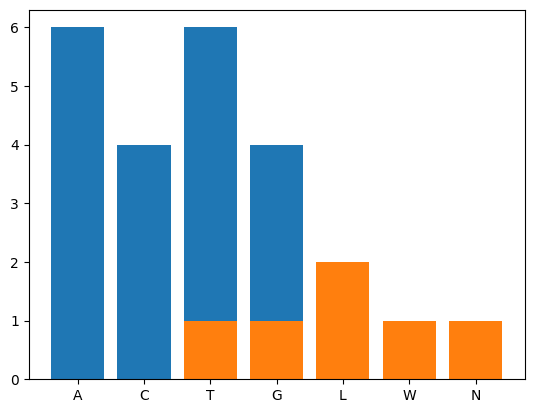

In [46]:
seqC = Seq(seqC)
print(seqC)
transcribedC = seqC.transcribe()
print(f"Transcribed Sequence C: {transcribedC}")
translatedC = transcribedC.translate()

freqC = Counter(seqC)
print(f"Frequency of each nucleotide in Sequence C: {freqC}")
freq = Counter(translatedC)
print(f"Frequency of each amino acid in Sequence C: {freq}")

plt.bar(freqC.keys(), freqC.values())
plt.bar(freq.keys(), freq.values())

In [ ]:
local_align = pairwise2.align.localxx(seqA,seqB)
global_align = pairwise2.align.globalxx(seqB, seqB)

local_align_reverse = pairwise2.align.localxx(seqA[::-1], seqB)
global_align_reverse = pairwise2.align.globalxx(seqB[::-1], seqB)

print(f"Local alignment: {local_align}")
print(f"Global alignment: {global_align}")

for al in local_align:
    print(format_alignment(*al))
for al in global_align:
    print(format_alignment(*al))
for al in local_align_reverse:
    print(format_alignment(*al))
for al in global_align_reverse:
    print(format_alignment(*al))
plt.show() #Gatau fungsinya apa

Local alignment: [Alignment(seqA='ACTCTTTGGCAACGACCCCTCGTCACAATAAAGATAGGGGGGCAACTAAAGGAAGCTCTATTAGATACAGGAGCAGATGATACAGTATTAGAAGAAATGAGTTTGCCAGGAAGATGGAAACCAAAAATGATAGGGGGAATTGGAGGTTTTATCAAAGTAAGACAGTATGATCAGATACTCATAGAAATCTGTGGACATAAAGCTATAGGTACAGTATTAGTAGGACCTACACCTGTCAACATAATTGGAAGAAATCTGTTGACTCAGATTGGTTGCACTTTAAATTTTATGGAAAAGGAAGGGAAAATTTCAAAAATTGGGCCTGAAAATCCATACAATACTCCAGTATTTGCCATAAAGAAAAAAGACAGTACTAAATGGAGAAAATTAGTAGATTTCAGAGAACTTAATAAGAGAACTCAAGACTTCTGGGAAGTTCAATTAGGAATACCACATCCCGCAGGGTTAAAAAAGAAAAAATCAGTAACAGTACTGGATGTGGGTGATGCATATTTTTCAGTTCCCTTAGATGAAGACTTCAGGAAGTATACTGCATTTACCATACCTAGTATAAACAATGAGACACCAGGGATTAGATATCAGTACAATGTGCTTCCACAGGGATGGAAAGGATCACCAGCAATATTCCAAAGTAGCATGACAAAAATCTTAGAGCCTTTTAGAAAACAAAATCCAGACATAGTTATCTATCAATACATGGATGATTTGTATGTAGGATCTGACTTAGAAATAGGGCAGCATAGAACAAAAATAGAGGAGCTGAGACAACATCTGTTGAGGTGGGGACTTACCACACCAGACAAAAAACATCAGAAAGAACCTCCATTCCTTTGGATGGGTTATGAACTCCATCCTGATAAATGGACA', seqB='ACTCTTTGGCAACGACCCCTCGTCACAATAAAGATAGGGGGGCAACTAAAGGAAGCTCTATTAGATACA